<a href="https://colab.research.google.com/github/aline-lessa/TrabalhoModMatIA/blob/main/DadosPocos_Luiza_Aline_MFernanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# **Conectando ao Google Drive e importando dados**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
dataset = pd.read_excel('/content/drive/My Drive/IA/Trabalho Final/dataset/DadosDensDTCLitologia.xlsx')
dataset

,Poço,Prof. Medida,DENSIDADE,DT COMPRESSIONAL,Cota,TVD,Litologia Interpretada (sistema)
0,POÇO09,"2856,00","2,64","117,43","-2828,81","2854,81",FOLHELHO
1,POÇO09,"2856,15","2,35","115,93","-2828,96","2854,96",FOLHELHO
2,POÇO09,"2856,30","1,84","115,66","-2829,11","2855,11",FOLHELHO
3,POÇO09,"2856,46","1,78","116,73","-2829,27","2855,27",FOLHELHO
4,POÇO09,"2856,61","1,84","118,79","-2829,42","2855,42",FOLHELHO
...,...,...,...,...,...,...,...
152226,POÇO03,"6025,13","2,60",NaN,"-5953,53","5985,53",COQUINA
152227,POÇO03,"6025,29","2,59",NaN,"-5953,69","5985,69",COQUINA
152228,POÇO03,"6025,44","2,56",NaN,"-5953,84","5985,84",COQUINA
152229,POÇO03,"6025,59","2,54",NaN,"-5953,99","5985,99",COQUINA


In [ ]:
dataset.describe()

,Poço,Prof. Medida,DENSIDADE,DT COMPRESSIONAL,Cota,TVD,Litologia Interpretada (sistema)
count,152231,152231,119404,142021,152231,152231,152231
unique,10,94173,214,12301,122690,113313,32
top,POÇO04,"3083,97","2,05","124,00","-2976,82","3197,20",HALITA
freq,23785,7,5089,496,4,6,47807


In [ ]:
dataset.isnull().sum()

,0
Poço,0
Prof. Medida,0
DENSIDADE,32827
DT COMPRESSIONAL,10210
Cota,0
TVD,0
Litologia Interpretada (sistema),0


# **Excluindo linhas com dados em branco**

In [ ]:
n_linhas_t=dataset.shape[0] #Quantidade de linhas na matriz
n_linhas_at=dataset.dropna().shape[0] #Exclui as linhas que NaN
linhas_exc = n_linhas_t-n_linhas_at
por_exc = (1-(n_linhas_at/n_linhas_t))*100 #% de excluídos
print("Porcentagem excluída do banco de dados foi {}%" .format(round(por_exc,2)))

Porcentagem excluída do banco de dados foi 27.45%


In [ ]:
dataset = dataset.dropna()
dataset.isnull().sum()

,0
Poço,0
Prof. Medida,0
DENSIDADE,0
DT COMPRESSIONAL,0
Cota,0
TVD,0
Litologia Interpretada (sistema),0


In [ ]:
dataset.describe()

,Poço,Prof. Medida,DENSIDADE,DT COMPRESSIONAL,Cota,TVD,Litologia Interpretada (sistema)
count,110441,110441,110441,110441,110441,110441,110441
unique,10,77744,214,12261,88538,84422,32
top,POÇO09,"3040,08","2,05","124,00","-2732,07","3196,44",FOLHELHO
freq,20488,7,4881,466,4,6,43249


# Gráfico com Distribuição de litologia


In [ ]:
import matplotlib.pyplot as plt

# Conta os valores de litologia
valores_litologia_abs = dataset['Litologia Interpretada (sistema)'].value_counts()
valores_litologia_pct = valores_litologia_abs / valores_litologia_abs.sum() * 100

In [ ]:
# Filtra os nomes das classes: mostra só se > 3%
labels = [nome if pct > 3 else '' for nome, pct in zip(valores_litologia_pct.index, valores_litologia_pct.values)]

# Função para mostrar porcentagem somente se > 3%
def mostrar_pct(pct):
    return f'{pct:.1f}%' if pct > 3 else ''

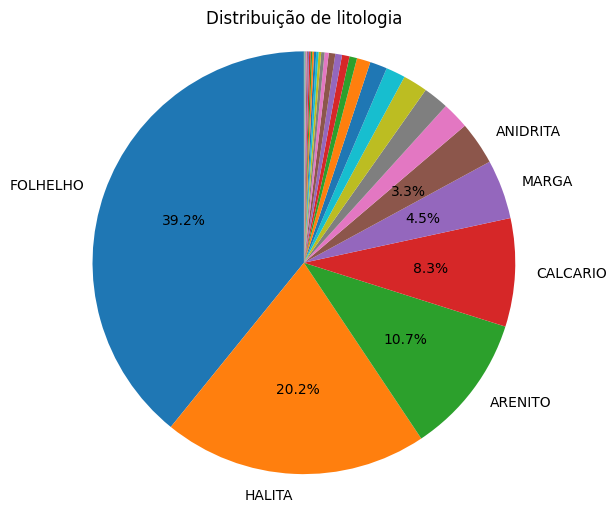

In [ ]:
# Cria o gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(valores_litologia_pct, labels=labels, autopct=mostrar_pct, startangle=90)
plt.title('Distribuição de litologia')
plt.axis('equal')  # Mantém formato circular
plt.show()

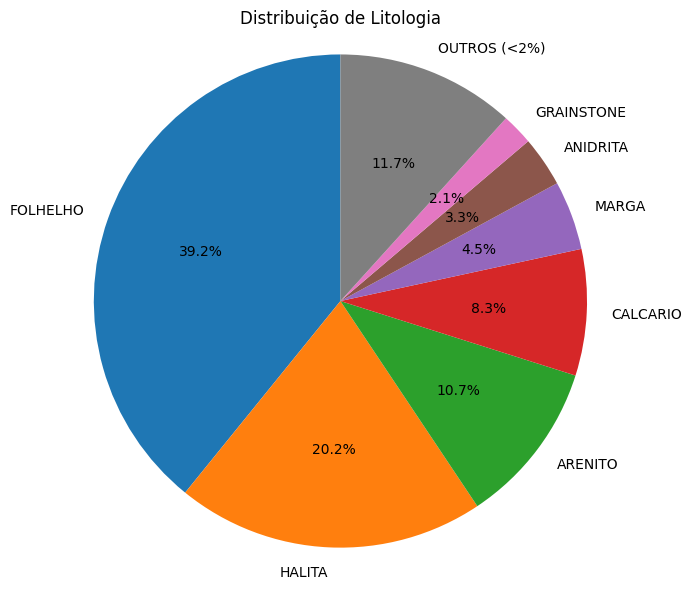

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Conta os valores absolutos
valores_abs = dataset['Litologia Interpretada (sistema)'].value_counts()
total = valores_abs.sum()

# Calcula porcentagem
valores_pct = valores_abs / total * 100

# Separa os dados
principais = valores_abs[valores_pct >= 2]
outros = valores_abs[valores_pct < 2].sum()

# Cria novo DataFrame com "Outros"
valores_com_outros = principais.copy()
if outros > 0:
    valores_com_outros['OUTROS (<2%)'] = outros

# Gera novo vetor de porcentagens
porcentagens = valores_com_outros / valores_com_outros.sum() * 100

# Função para mostrar apenas rótulos significativos
def mostrar_pct(pct):
    return f'{pct:.1f}%' if pct > 2 else ''

# Gráfico de pizza com "Outros"
plt.figure(figsize=(7, 7))
plt.pie(valores_com_outros, labels=valores_com_outros.index, autopct=mostrar_pct, startangle=90)
plt.title("Distribuição de Litologia")
plt.axis('equal')
plt.show()


In [ ]:
# Converte para DataFrame
tabela = valores_litologia_pct.reset_index()
tabela.columns = ['Classe', 'Porcentagem (%)']

# Exibe a tabela formatada
print(tabela)

                        Classe  Porcentagem (%)
0                     FOLHELHO        39.160276
1                       HALITA        20.208075
2                      ARENITO        10.746915
3                     CALCARIO         8.278628
4                        MARGA         4.532737
5                     ANIDRITA         3.296783
6                   GRAINSTONE         2.062640
7                      COQUINA         1.941308
8                    CARNALITA         1.879737
9                     MUDSTONE         1.487672
10                  TAQUIDRITA         1.315635
11                     SILTITO         1.044902
12                    ARGILITO         0.578589
13            FOLHELHO SILTICO         0.572251
14                   PACKSTONE         0.514302
15                    RUDSTONE         0.498003
16                ESFERULITITO         0.316006
17  VULCANICA NAO IDENTIFICADA         0.258962
18  ESTROMATOLITO ARBORESCENTE         0.198296
19                    DOLOMITO         0

# Adicionando coluna com informação de LDA

In [ ]:
lda_df = pd.read_excel('/content/drive/My Drive/IA/Trabalho Final/dataset/DadosLDA.xlsx') #carrega arquivo com informações de LDA
print(lda_df)

     Poço Lâmina d'água
0  POÇO09       1888,00
1  POÇO08       1690,00
2  POÇO07       2001,00
3  POÇO10       2049,00
4  POÇO06       1818,00
5  POÇO04       1751,00
6  POÇO05       2062,04
7  POÇO01       2020,00
8  POÇO02       1929,00
9  POÇO03       2136,00


In [ ]:
dicionario_lda = dict(zip(lda_df['Poço'], lda_df["Lâmina d'água"])) #cria dicionário para mapeamento de LDA
print(dicionario_lda)

{'POÇO09': '1888,00', 'POÇO08': '1690,00', 'POÇO07': '2001,00', 'POÇO10': '2049,00', 'POÇO06': '1818,00', 'POÇO04': '1751,00', 'POÇO05': '2062,04', 'POÇO01': '2020,00', 'POÇO02': '1929,00', 'POÇO03': '2136,00'}


In [ ]:
dataset.loc[:,"Lâmina d'água"] = dataset["Poço"].map(dicionario_lda)

<ipython-input-16-3c6a8090b24e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[:,"Lâmina d'água"] = dataset["Poço"].map(dicionario_lda)


In [ ]:
colunas_para_converter = ['Prof. Medida', 'DENSIDADE', 'DT COMPRESSIONAL', 'Cota', 'TVD', "Lâmina d'água"] #colunas para converter vírgula em ponto

for col in colunas_para_converter:
    dataset.loc[:, col] = (
        dataset[col]
        .astype(str)
        .str.replace(',', '.', regex=False)
        .astype(float)
    )



In [ ]:
dataset.loc[:,"Soterramento"] = - dataset["Lâmina d'água"] - dataset['Cota'] #cria coluna de soterramento

<ipython-input-18-87a3aaac2da6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[:,"Soterramento"] = - dataset["Lâmina d'água"] - dataset['Cota'] #cria coluna de soterramento


In [ ]:
# Cria cópia da dataset somente com colunas numéricas
numeric_dataset = dataset.copy()
del numeric_dataset['Poço']
del numeric_dataset['Litologia Interpretada (sistema)']

In [ ]:
dataset

,Poço,Prof. Medida,DENSIDADE,DT COMPRESSIONAL,Cota,TVD,Litologia Interpretada (sistema),Lâmina d'água,Soterramento
0,POÇO09,2856.0,2.64,117.43,-2828.81,2854.81,FOLHELHO,1888.0,940.81
1,POÇO09,2856.15,2.35,115.93,-2828.96,2854.96,FOLHELHO,1888.0,940.96
2,POÇO09,2856.3,1.84,115.66,-2829.11,2855.11,FOLHELHO,1888.0,941.11
3,POÇO09,2856.46,1.78,116.73,-2829.27,2855.27,FOLHELHO,1888.0,941.27
4,POÇO09,2856.61,1.84,118.79,-2829.42,2855.42,FOLHELHO,1888.0,941.42
...,...,...,...,...,...,...,...,...,...
152174,POÇO03,6017.21,2.46,59.06,-5945.61,5977.61,COQUINA,2136.0,3809.61
152175,POÇO03,6017.36,2.47,59.19,-5945.76,5977.76,COQUINA,2136.0,3809.76
152176,POÇO03,6017.51,2.47,59.36,-5945.91,5977.91,COQUINA,2136.0,3809.91
152177,POÇO03,6017.67,2.48,59.45,-5946.07,5978.07,COQUINA,2136.0,3810.07


In [ ]:
numeric_dataset

,Prof. Medida,DENSIDADE,DT COMPRESSIONAL,Cota,TVD,Lâmina d'água,Soterramento
0,2856.0,2.64,117.43,-2828.81,2854.81,1888.0,940.81
1,2856.15,2.35,115.93,-2828.96,2854.96,1888.0,940.96
2,2856.3,1.84,115.66,-2829.11,2855.11,1888.0,941.11
3,2856.46,1.78,116.73,-2829.27,2855.27,1888.0,941.27
4,2856.61,1.84,118.79,-2829.42,2855.42,1888.0,941.42
...,...,...,...,...,...,...,...
152174,6017.21,2.46,59.06,-5945.61,5977.61,2136.0,3809.61
152175,6017.36,2.47,59.19,-5945.76,5977.76,2136.0,3809.76
152176,6017.51,2.47,59.36,-5945.91,5977.91,2136.0,3809.91
152177,6017.67,2.48,59.45,-5946.07,5978.07,2136.0,3810.07


In [ ]:
# Cria dataset só com colunas numéricas onde litologia é somente 'FOLHELHO'
folhelho_numeric_dataset = dataset.copy()
folhelho_numeric_dataset = folhelho_numeric_dataset[folhelho_numeric_dataset['Litologia Interpretada (sistema)'] == 'FOLHELHO']
del folhelho_numeric_dataset['Poço']
del folhelho_numeric_dataset['Litologia Interpretada (sistema)']

In [ ]:
folhelho_numeric_dataset

,Prof. Medida,DENSIDADE,DT COMPRESSIONAL,Cota,TVD,Lâmina d'água,Soterramento
0,2856.0,2.64,117.43,-2828.81,2854.81,1888.0,940.81
1,2856.15,2.35,115.93,-2828.96,2854.96,1888.0,940.96
2,2856.3,1.84,115.66,-2829.11,2855.11,1888.0,941.11
3,2856.46,1.78,116.73,-2829.27,2855.27,1888.0,941.27
4,2856.61,1.84,118.79,-2829.42,2855.42,1888.0,941.42
...,...,...,...,...,...,...,...
151855,5968.59,2.6,64.93,-5896.99,5928.99,2136.0,3760.99
151856,5968.75,2.57,63.69,-5897.15,5929.15,2136.0,3761.15
151857,5968.9,2.52,63.51,-5897.3,5929.3,2136.0,3761.3
151858,5969.05,2.47,63.73,-5897.45,5929.45,2136.0,3761.45


# **Montando Matriz de Correlação entre as variáveis para todo o DataSet**

In [ ]:
# Calcula a correlação apenas nas colunas numéricas
corr_Pearson = numeric_dataset.corr() # correlação Pearson

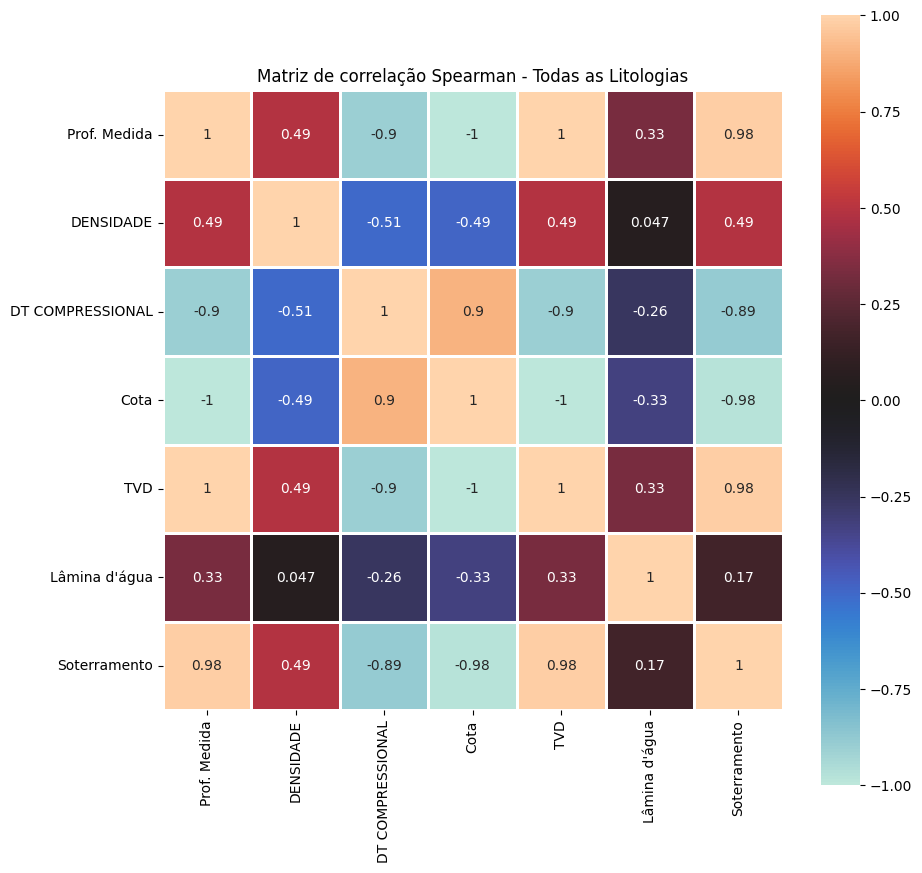

In [ ]:
import seaborn as sns

corr_Spearman = numeric_dataset.iloc[:,:].corr(method='spearman')

fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(corr_Spearman,
                 vmin=-1,
                 vmax=1,
                 center=0,
                 square=True,
                 annot=True,
                 linewidths=0.8)
ax.set_ylim(len(corr_Spearman),0)
plt.title('Matriz de correlação Spearman - Todas as Litologias')
plt.show()

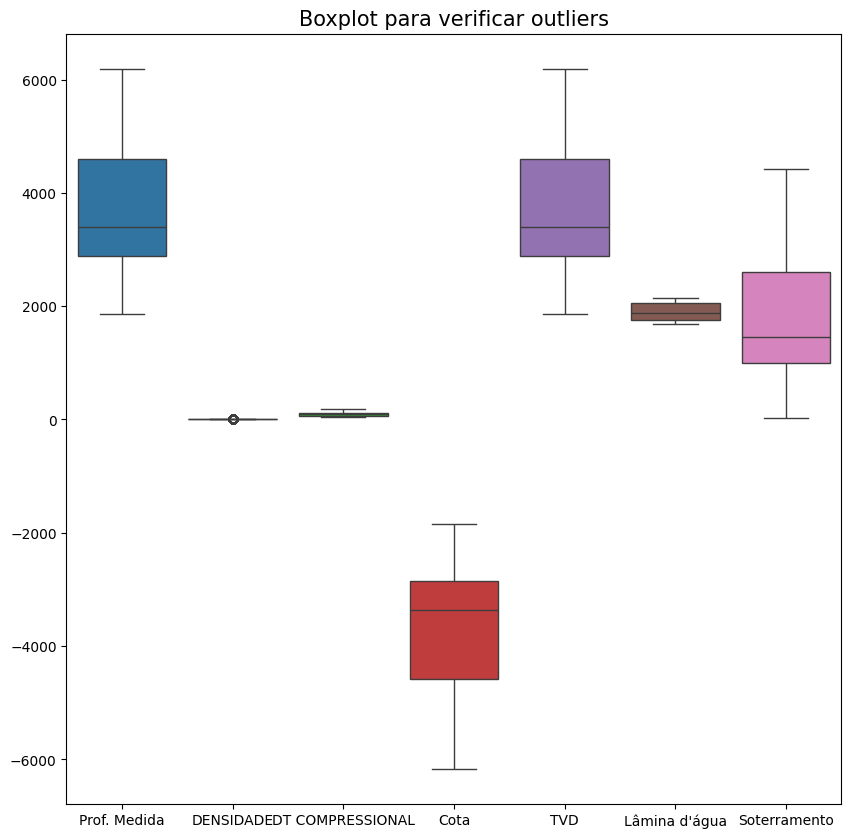

In [ ]:
fig2 = plt.figure(figsize=(10,10))
sns.boxplot(data=numeric_dataset)

# Adicionar título e rótulos aos eixos
plt.title('Boxplot para verificar outliers', fontsize=15)


# Exibir o gráfico
plt.show()


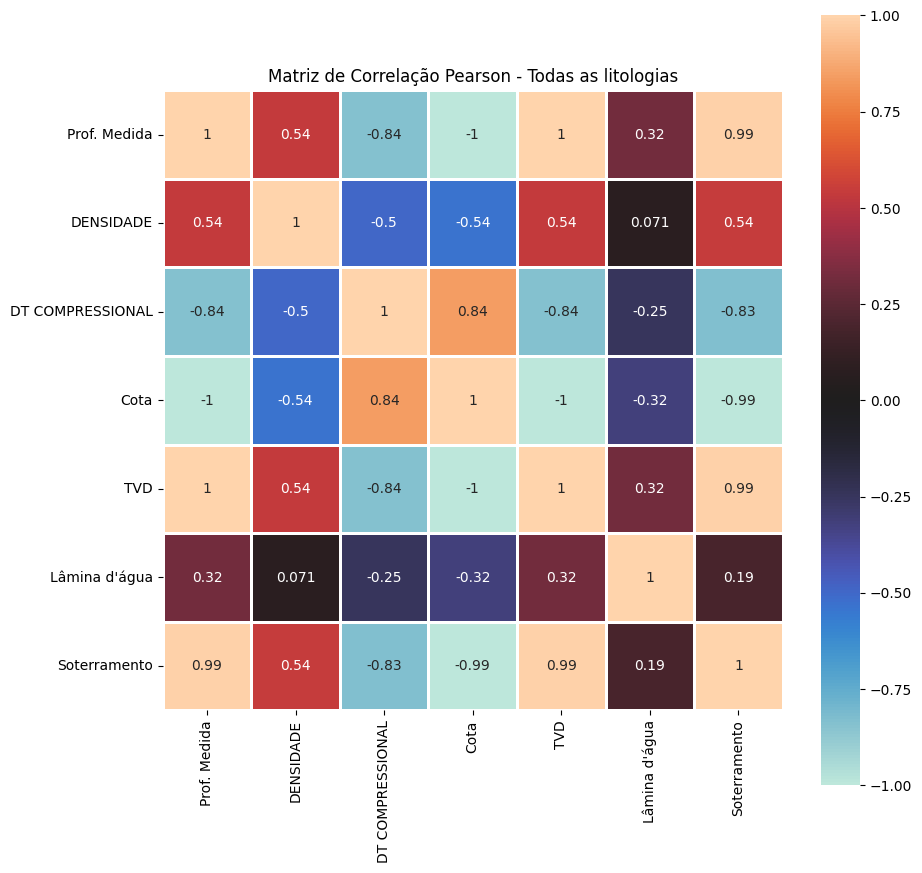

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

fig1 = plt.figure(figsize=(10,10))
ax = sns.heatmap(corr_Pearson,
                 vmin=-1,
                 vmax=1,
                 center=0,
                 square=True,
                 annot=True,
                 linewidths=0.8)
ax.set_ylim(len(corr_Pearson),0)
plt.title('Matriz de Correlação Pearson - Todas as litologias')
plt.show()

# **Montando Matriz de Correlação entre as variáveis para Folhelhos**

In [ ]:
# Calcula a correlação apenas nas colunas numéricas
corr_Pearson = folhelho_numeric_dataset.corr() # correlação Pearson

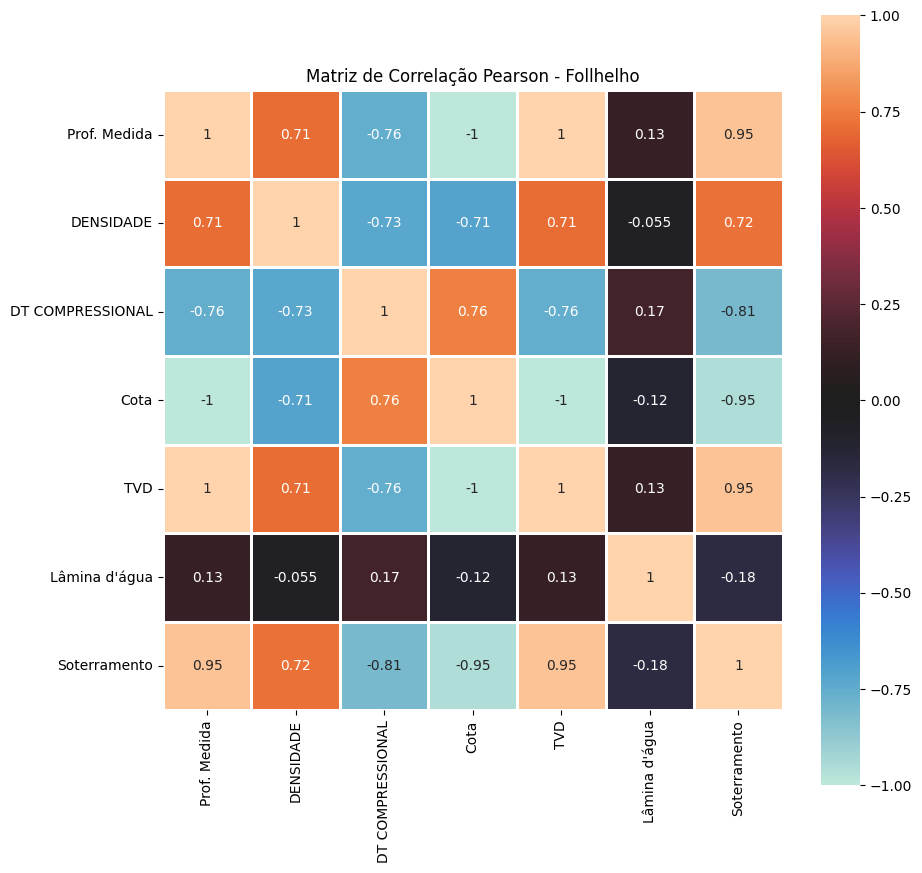

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

fig1 = plt.figure(figsize=(10,10))
ax = sns.heatmap(corr_Pearson,
                 vmin=-1,
                 vmax=1,
                 center=0,
                 square=True,
                 annot=True,
                 linewidths=0.8)
ax.set_ylim(len(corr_Pearson),0)
plt.title('Matriz de Correlação Pearson - Follhelho')
plt.show()

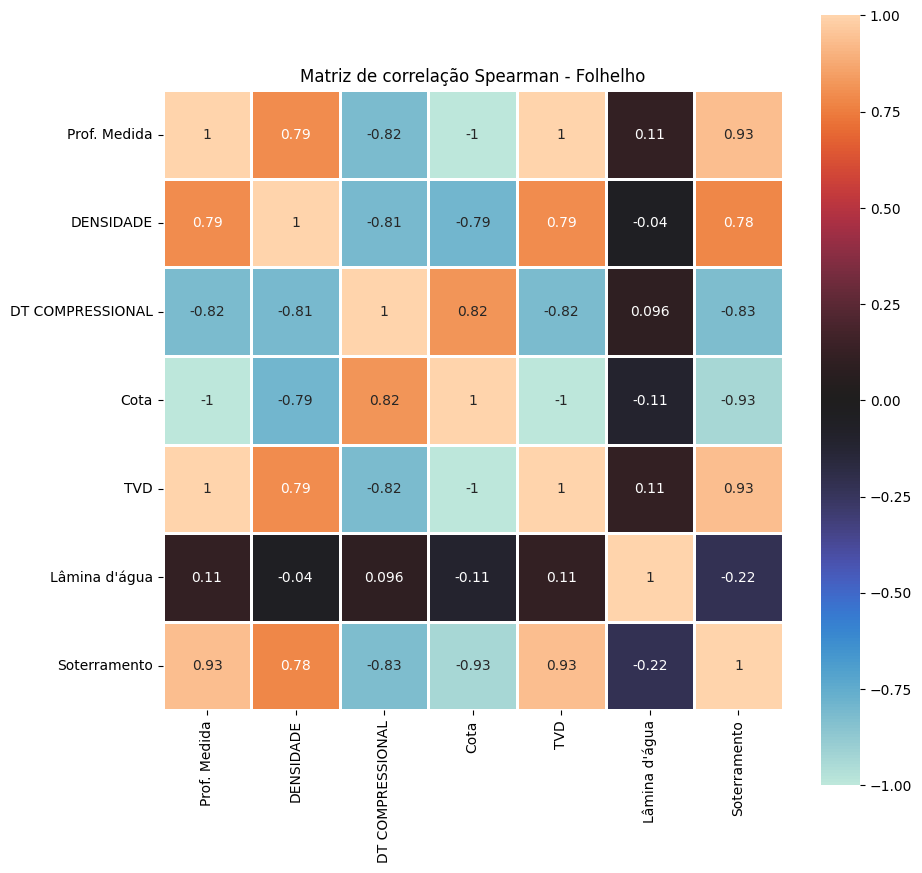

In [ ]:
corr_Spearman = folhelho_numeric_dataset.iloc[:,:].corr(method='spearman')

fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(corr_Spearman,
                 vmin=-1,
                 vmax=1,
                 center=0,
                 square=True,
                 annot=True,
                 linewidths=0.8)
ax.set_ylim(len(corr_Spearman),0)
plt.title('Matriz de correlação Spearman - Folhelho')
plt.show()

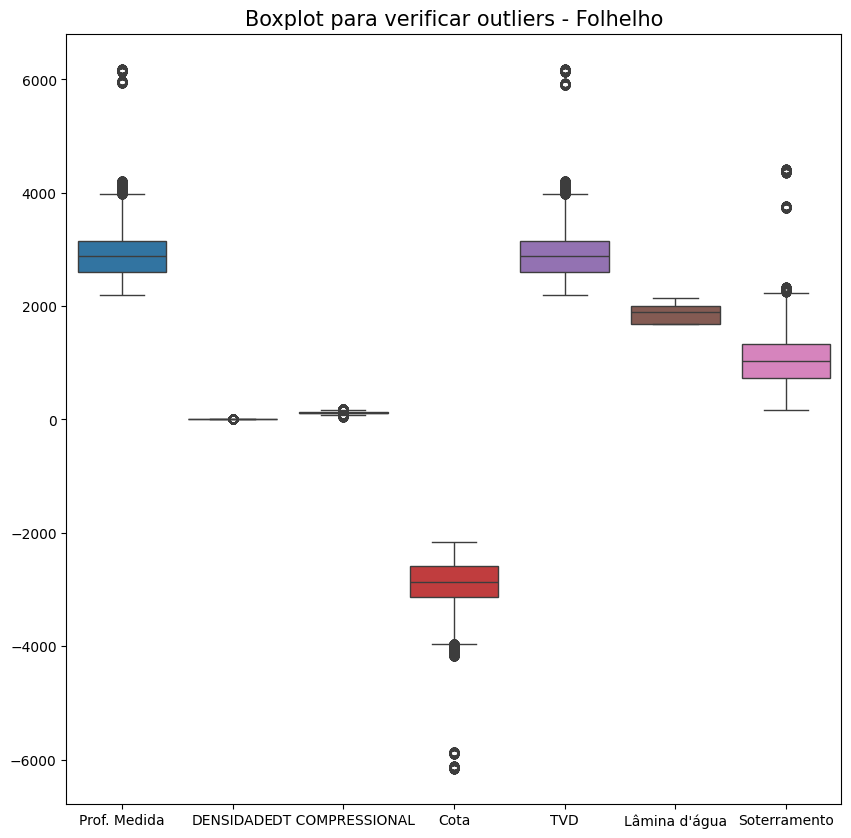

In [ ]:
fig2 = plt.figure(figsize=(10,10))
sns.boxplot(data=folhelho_numeric_dataset)

# Adicionar título e rótulos aos eixos
plt.title('Boxplot para verificar outliers - Folhelho', fontsize=15)


# Exibir o gráfico
plt.show()


# **Seleção de Variáveis - Pacote Prince**

In [ ]:
!pip install prince
import prince

# Configura PCA
pca = prince.PCA(
    n_components=7,
    n_iter=10,
    rescale_with_mean=True,
    rescale_with_std=True,
    engine='sklearn',
    random_state=200)

# Ajusta o modelo
pca = pca.fit(numeric_dataset)

# Mostra os autovalores
print(pca.eigenvalues_summary)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 kB 12.3 MB/s eta 0:00:00
          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              5.174        73.91%                     73.91%
1              0.957        13.67%                     87.58%
2              0.619         8.84%                     96.42%
3              0.250         3.58%                    100.00%
4              0.000         0.00%                    100.00%
5              0.000         0.00%                    100.00%
6              0.000         0.00%                    100.00%


O que isso mostra:

O componente 0 captura quase 74% da variância total dos dados.

Os três primeiros componentes somam mais de 96% da variância, o que significa que a maioria da informação dos dados pode ser representada em 2 ou 3 dimensões.

In [ ]:
pca.scree_plot()

alt.Chart(...)

In [ ]:
pca.column_contributions_.style.format('{:.0%}')

component,0,1,2,3,4,5,6
variable,,,,,,,
Prof. Medida,19%,0%,2%,4%,73%,2%,0%
DENSIDADE,7%,13%,80%,0%,0%,0%,0%
DT COMPRESSIONAL,15%,0%,1%,84%,0%,0%,0%
Cota,19%,0%,2%,4%,12%,12%,51%
TVD,19%,0%,2%,4%,2%,73%,0%
Lâmina d'água,2%,86%,11%,0%,0%,0%,1%
Soterramento,19%,1%,3%,4%,12%,13%,48%


A componente 2 representa fortemente a DENSIDADE. Isso é essencial, porque mostra que a variabilidade da densidade está em uma direção separada das demais (componentes 0 e 1), sugerindo que ela tem comportamento próprio, e pode ser prevista por um subconjunto específico de variáveis.

In [ ]:
pca.column_correlations

component,0,1,2,3,4,5,6
variable,,,,,,,
Prof. Medida,0.989418,-0.016177,-0.103804,-0.099974,0.004527,2.588173e-04,-7.094275e-29
DENSIDADE,0.619771,0.349895,0.702293,-0.015570,-0.000007,4.842495e-07,-7.283741e-32
DT COMPRESSIONAL,-0.885011,-0.031135,0.078361,-0.457871,-0.000006,3.867440e-08,-1.582838e-31
Cota,-0.989286,0.013176,0.106108,0.099379,0.001812,-6.722288e-04,1.183147e-15
TVD,0.989374,-0.015211,-0.104985,-0.099412,-0.000810,-1.637886e-03,1.458069e-28
Lâmina d'água,0.334780,-0.906619,0.256822,0.002623,-0.000257,9.268271e-05,1.503315e-16
Soterramento,0.978615,0.105453,-0.143410,-0.103068,-0.001839,6.826818e-04,1.144622e-15


Cada valor da tabela representa a correlação de uma variável com um componente principal, ou seja, quanto cada variável "constrói" ou "explica" cada componente.

A variável DENSIDADE está fortemente correlacionada com Componente 2, e em parte com os componentes 0 e 1.

As variáveis que mais contribuem para os componentes 0, 1 e 2 são:

Prof. Medida, TVD, Cota, Soterramento (→ componente 0)

Lâmina d’água (→ componente 1)

DT COMPRESSIONAL e DENSIDADE (→ componente 2)

In [ ]:
CP = pca.transform (numeric_dataset)
CP

component,0,1,2,3,4,5,6
0,-1.248047,0.677145,2.047108,-0.025160,-0.000705,-0.000250,-1.882405e-15
1,-1.538374,0.272636,1.028699,0.054297,0.000787,-0.000538,-1.800301e-15
2,-2.078809,-0.441175,-0.754639,0.124292,0.003319,-0.001042,-1.795072e-15
3,-2.155977,-0.526275,-0.960982,0.099937,0.003573,-0.001101,-1.693286e-15
4,-2.117559,-0.444366,-0.744758,0.031777,0.003196,-0.001040,-1.799079e-15
...,...,...,...,...,...,...,...
152174,4.344029,-0.975342,0.196578,-0.491831,0.024086,0.003273,-2.342462e-15
152175,4.353301,-0.961465,0.231866,-0.496991,0.024031,0.003283,-2.550697e-15
152176,4.351405,-0.961630,0.232332,-0.502113,0.024024,0.003283,-2.109959e-15
152177,4.361195,-0.947711,0.267486,-0.506101,0.023970,0.003293,-2.307093e-15


# **PCA sem coluna Densidade**

In [ ]:
# 1. Retira a variável alvo para PCA técnico
X = numeric_dataset.drop(columns=['DENSIDADE'])

# 2. Aplica PCA
pca = prince.PCA(
    n_components=6,
    n_iter=10,
    rescale_with_mean=True,
    rescale_with_std=True,
    engine='sklearn',
    random_state=200)
pca = pca.fit(X)

# Mostra os autovalores
print(pca.eigenvalues_summary)

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              4.839        80.65%                     80.65%
1              0.910        15.17%                     95.82%
2              0.251         4.18%                    100.00%
3              0.000         0.00%                    100.00%
4              0.000         0.00%                    100.00%
5              0.000         0.00%                    100.00%


Como a coluna "DENSIDADE" foi removida dos dados de entrada, essa tabela agora mostra como as variáveis explicativas se relacionam entre si — sem influência direta da variável alvo.

Interpretação:
A componente 0 representa uma combinação linear das variáveis explicativas que captura 80,65% da variação total nos dados. É a direção com maior variabilidade.

A componente 1 adiciona mais 15,17%, totalizando 95,82% com apenas duas componentes.

Isso quer dizer que as variáveis têm correlação forte entre si, e os dados estão altamente concentrados em um subespaço de 2 dimensões.

O PCA conseguiu comprimir muito bem a informação, o que é ótimo para:

Visualização 2D;

Redução de dimensionalidade antes de treinar um modelo;

Eliminação de colinearidade.

In [ ]:
pca.scree_plot()

alt.Chart(...)

In [ ]:
pca.column_contributions_.style.format('{:.0%}')

component,0,1,2,3,4,5
variable,,,,,,
Prof. Medida,20%,0%,4%,73%,2%,0%
DT COMPRESSIONAL,16%,1%,83%,0%,0%,0%
Cota,20%,0%,4%,12%,12%,51%
TVD,20%,0%,4%,2%,73%,0%
Lâmina d'água,3%,96%,0%,0%,0%,1%
Soterramento,20%,3%,4%,12%,12%,48%


In [ ]:
pca.column_correlations

component,0,1,2,3,4,5
variable,,,,,,
Prof. Medida,0.994171,-0.034688,-0.101982,0.004609,-2.748390e-04,-2.151441e-29
DT COMPRESSIONAL,-0.886758,0.071588,-0.456657,-0.000005,5.438041e-08,1.000119e-31
Cota,-0.994102,0.038252,0.101464,0.001865,6.703114e-04,9.634983e-16
TVD,0.994187,-0.035972,-0.101467,-0.000786,1.649780e-03,1.443535e-29
Lâmina d'água,0.353977,0.935242,0.004802,-0.000264,-9.234561e-05,1.224227e-16
Soterramento,0.981070,-0.162371,-0.105510,-0.001893,-6.807441e-04,9.321250e-16


In [ ]:
CP = pca.transform (numeric_dataset)
CP

component,0,1,2,3,4,5
0,-1.786045,0.146964,0.043867,0.002060,0.000784,-1.819498e-15
1,-1.766321,0.143299,0.087832,0.002108,0.000782,-1.733897e-15
2,-1.762571,0.142607,0.095655,0.002117,0.000782,-1.836193e-15
3,-1.776207,0.145152,0.064096,0.002081,0.000783,-1.730677e-15
4,-1.802716,0.150093,0.003455,0.002014,0.000785,-1.832973e-15
...,...,...,...,...,...,...
152174,4.232600,0.947054,-0.488625,0.024240,-0.003449,-1.120304e-15
152175,4.231155,0.947330,-0.492556,0.024235,-0.003449,-1.325042e-15
152176,4.229191,0.947702,-0.497662,0.024229,-0.003448,-1.102851e-15
152177,4.228282,0.947878,-0.500425,0.024226,-0.003448,-1.296255e-15


# Feature selection

In [ ]:
x = numeric_dataset.drop(['DENSIDADE'], axis=1)
y = numeric_dataset['DENSIDADE']

x = x.dropna()
y = y.loc[x.index]  # garantir alinhamento

print(x)
print(y)

       Prof. Medida DT COMPRESSIONAL     Cota      TVD Lâmina d'água  \
0            2856.0           117.43 -2828.81  2854.81        1888.0   
1           2856.15           115.93 -2828.96  2854.96        1888.0   
2            2856.3           115.66 -2829.11  2855.11        1888.0   
3           2856.46           116.73 -2829.27  2855.27        1888.0   
4           2856.61           118.79 -2829.42  2855.42        1888.0   
...             ...              ...      ...      ...           ...   
152174      6017.21            59.06 -5945.61  5977.61        2136.0   
152175      6017.36            59.19 -5945.76  5977.76        2136.0   
152176      6017.51            59.36 -5945.91  5977.91        2136.0   
152177      6017.67            59.45 -5946.07  5978.07        2136.0   
152178      6017.82            59.51 -5946.22  5978.22        2136.0   

       Soterramento  
0            940.81  
1            940.96  
2            941.11  
3            941.27  
4            941.42  
...

# Chi² (para variáveis categóricas ou discretizadas)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler

# Seleciona variáveis (X) e a variável-alvo (y)
x = numeric_dataset[['DT COMPRESSIONAL', 'TVD', 'Soterramento']]
y = numeric_dataset['DENSIDADE']


# Chi2 requer que os dados sejam positivos e discretos
from sklearn.preprocessing import MinMaxScaler
x_chi = MinMaxScaler().fit_transform(x)

chi_scores = chi2(x_chi, y)

# Organizar resultados
chi2_df = pd.DataFrame({'Feature': x.columns, 'Chi2': chi_scores[0], 'p-Value': chi_scores[1]})
chi2_df = chi2_df.sort_values(by='Chi2', ascending=False)
print(chi2_df)






NameError: name 'chi2' is not defined

#**LASSO considerando coluna litologia**

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

df_lasso = dataset.copy()

df_lasso = df_lasso.drop(columns=['Poço']) #Removendo coluna não útil

# Converter categorias em variáveis dummies
df_lasso = pd.get_dummies(df_lasso, columns=['Litologia Interpretada (sistema)'], drop_first=True)

# Seleciona X (variáveis) e y (alvo)
X = df_lasso.drop(columns=['DENSIDADE'])
y = df_lasso['DENSIDADE']

# Criar pipeline com normalização + Lasso com validação cruzada
lasso = make_pipeline(StandardScaler(), LassoCV(cv=5, random_state=42))

# Treinar o modelo
lasso.fit(X, y)

# Acessar o modelo treinado
modelo_lasso = lasso.named_steps['lassocv']

# Coeficientes das variáveis
coef = pd.Series(modelo_lasso.coef_, index=X.columns)
print("Coeficientes Lasso:")
print(coef)



Coeficientes Lasso:
Prof. Medida                                                   0.040833
DT COMPRESSIONAL                                              -0.169469
Cota                                                          -0.000000
TVD                                                            0.000725
Lâmina d'água                                                  0.003907
Soterramento                                                   0.000000
Litologia Interpretada (sistema)_ARENITO                      -0.058692
Litologia Interpretada (sistema)_ARGILITO                     -0.044703
Litologia Interpretada (sistema)_BASALTO                      -0.000000
Litologia Interpretada (sistema)_BRECHA CARBONATICA           -0.001120
Litologia Interpretada (sistema)_CALCARIO                     -0.040005
Litologia Interpretada (sistema)_CALCARIO CRISTALINO          -0.002847
Litologia Interpretada (sistema)_CARNALITA                    -0.098172
Litologia Interpretada (sistema)_COQUINA    

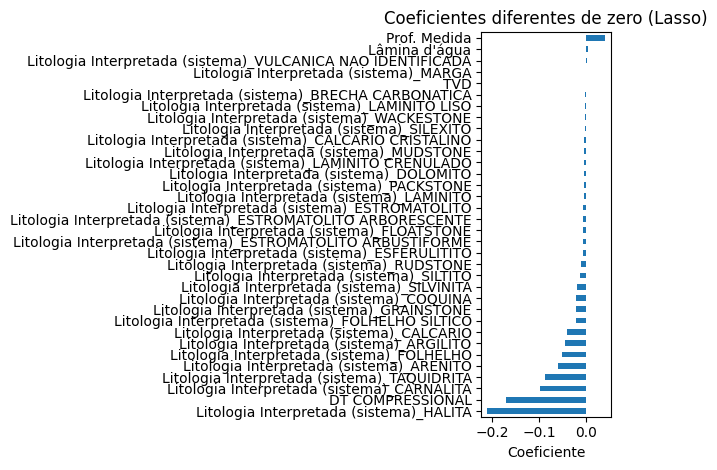

In [ ]:
coef[coef != 0].sort_values().plot(kind="barh", title="Coeficientes diferentes de zero (Lasso)")
plt.xlabel("Coeficiente")
plt.tight_layout()
plt.show()

# **Lasso considerando somente variáveis numéricas**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1297502684324172, tolerance: 0.5577122179712944
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.078973284458243, tolerance: 0.5577122179712944
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.991928283611287, tolerance: 0.5577122179712944
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: Convergen

Coeficientes Lasso (≠ 0):
DT COMPRESSIONAL   -0.018970
Soterramento        0.091101
dtype: float64


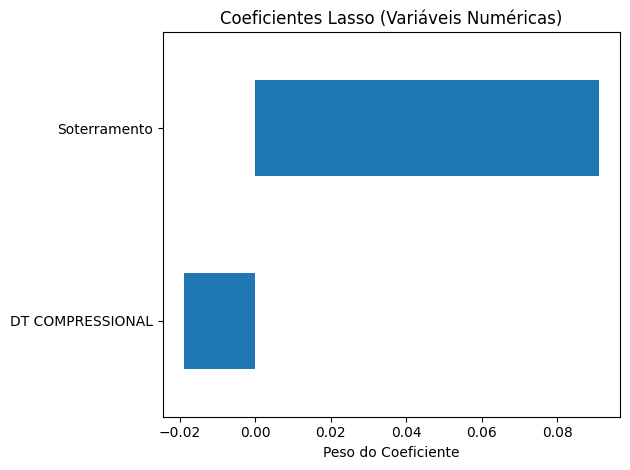

In [ ]:
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Copia da base original (suponha que 'dataset' é o DataFrame carregado)
df_lasso = numeric_dataset.copy()

# Separa variável alvo (DENSIDADE) e preditoras
X = df_lasso.drop(columns=['DENSIDADE'])
y = df_lasso['DENSIDADE']

# Cria pipeline: padronização + Lasso com validação cruzada
pipeline = make_pipeline(StandardScaler(), LassoCV(cv=5, random_state=42))

# Treina o modelo
pipeline.fit(X, y)

# Extrai modelo treinado de dentro do pipeline
modelo_lasso = pipeline.named_steps['lassocv']

# Extrai os coeficientes
coef = pd.Series(modelo_lasso.coef_, index=X.columns)

# Exibe os coeficientes diferentes de zero
print("Coeficientes Lasso (≠ 0):")
print(coef[coef != 0])

# Visualiza os coeficientes
coef[coef != 0].sort_values().plot(kind='barh', title='Coeficientes Lasso (Variáveis Numéricas)')
plt.xlabel("Peso do Coeficiente")
plt.tight_layout()
plt.show()
